In [ ]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'100',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '221b8fca-ef72-4c48-9966-2fb0115f8162',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

In [7]:
type(data)

dict

In [9]:
import pandas as pd

#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

In [11]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')

In [13]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,...,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,12035,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.985175e+07,1.985175e+07,...,62.9259,1.783972e+12,NaN,2025-04-15T16:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-04-15 19:09:28.851844
1,1027,Ethereum,ETH,ethereum,10132,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.206931e+08,1.206931e+08,...,7.3031,1.957251e+11,NaN,2025-04-15T16:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-04-15 19:09:28.851844
2,825,Tether USDt,USDT,tether,124200,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, usd-stab...",NaN,1.445736e+11,1.480590e+11,...,5.3939,1.480437e+11,NaN,2025-04-15T16:07:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-04-15 19:09:28.851844
3,52,XRP,XRP,xrp,1589,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",1.000000e+11,5.833814e+10,9.998625e+10,...,4.6521,2.137140e+11,NaN,2025-04-15T16:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-04-15 19:09:28.851844
4,1839,BNB,BNB,bnb,2470,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.424704e+08,1.424704e+08,...,3.1088,8.331621e+10,NaN,2025-04-15T16:08:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-04-15 19:09:28.851844
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,7186,PancakeSwap,CAKE,pancakeswap,1668,2020-09-25T00:00:00.000Z,"[collectibles-nfts, decentralized-exchange-dex...",4.500000e+08,2.899559e+08,3.728370e+08,...,0.0201,8.347425e+08,1.555850e+09,2025-04-15T16:08:00.000Z,1027.0,Ethereum,ETH,ethereum,0x152649eA73beAb28c5b49B26eb48f7EAD6d4c898,2025-04-15 19:09:28.851844
96,1966,Decentraland,MANA,decentraland,565,2017-09-17T00:00:00.000Z,"[platform, collectibles-nfts, gaming, payments...",NaN,1.942255e+09,2.193179e+09,...,0.0200,6.040070e+08,NaN,2025-04-15T16:08:00.000Z,1027.0,Ethereum,ETH,ethereum,0x0f5d2fb29fb7d3cfee444a200298f468908cc942,2025-04-15 19:09:28.851844
97,10804,FLOKI,FLOKI,floki-inu,630,2021-07-09T00:00:00.000Z,"[gaming, memes, ethereum-ecosystem, metaverse,...",NaN,9.625418e+12,9.661551e+12,...,0.0196,5.282676e+08,NaN,2025-04-15T16:08:00.000Z,1027.0,Ethereum,ETH,ethereum,0xcf0c122c6b73ff809c693db761e7baebe62b6a2e,2025-04-15 19:09:28.851844
98,28541,Jito,JTO,jito,298,2023-12-07T16:04:41.000Z,"[defi, staking, dao, solana-ecosystem, liquid-...",NaN,3.167499e+08,9.999998e+08,...,0.0193,1.634752e+09,NaN,2025-04-15T16:08:00.000Z,5426.0,Solana,SOL,solana,jtojtomepa8beP8AuQc6eXt5FriJwfFMwQx2v2f9mCL,2025-04-15 19:09:28.851844


In [15]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'100',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '221b8fca-ef72-4c48-9966-2fb0115f8162',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    #df = pd.concat([df,df2])

    if not os.path.isfile(r'C:\Users\claod\Desktop\Data Analysis\Pytho&Pandas\API.csv'):
        df.to_csv(r'C:\Users\claod\Desktop\Data Analysis\Pytho&Pandas\API.csv', header='column_names')
    else:
        df.to_csv(r'C:\Users\claod\Desktop\Data Analysis\Pytho&Pandas\API.csv', mode='a', header=False)

In [ ]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner Completed Successfully.')
    sleep(86400)
exit()

In [17]:
df3 = pd.read_csv(r'C:\Users\claod\Desktop\Data Analysis\Pytho&Pandas\API.csv')
df3

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,...,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,12021,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.984893e+07,...,62.8852,1.704327e+12,NaN,2025-04-09T17:34:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-04-09 20:37:06.110774
1,1,1027,Ethereum,ETH,ethereum,10115,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.206785e+08,...,7.4933,1.919531e+11,NaN,2025-04-09T17:35:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-04-09 20:37:06.110774
2,2,825,Tether USDt,USDT,tether,123322,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'usd...",NaN,1.440144e+11,...,5.6169,1.477276e+11,NaN,2025-04-09T17:34:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-04-09 20:37:06.110774
3,3,52,XRP,XRP,xrp,1581,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.827497e+10,...,4.5891,2.017307e+11,NaN,2025-04-09T17:35:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-04-09 20:37:06.110774
4,4,1839,BNB,BNB,bnb,2458,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.424709e+08,...,3.1964,8.234515e+10,NaN,2025-04-09T17:35:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-04-09 20:37:06.110774
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,95,28541,Jito,JTO,jito,298,2023-12-07T16:04:41.000Z,"['defi', 'staking', 'dao', 'solana-ecosystem',...",NaN,3.144890e+08,...,0.0208,1.731069e+09,NaN,2025-04-09T20:31:00.000Z,5426.0,Solana,SOL,solana,jtojtomepa8beP8AuQc6eXt5FriJwfFMwQx2v2f9mCL,2025-04-09 23:33:22.981531
496,96,3871,AB,AB,newton,30,2019-04-17T00:00:00.000Z,"['mineable', 'marketplace', 'enterprise-soluti...",9.882366e+10,5.278981e+10,...,0.0205,1.002506e+09,NaN,2025-04-09T20:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-04-09 23:33:22.981531
497,97,10804,FLOKI,FLOKI,floki-inu,626,2021-07-09T00:00:00.000Z,"['gaming', 'memes', 'ethereum-ecosystem', 'met...",NaN,9.625443e+12,...,0.0200,5.237995e+08,NaN,2025-04-09T20:31:00.000Z,1027.0,Ethereum,ETH,ethereum,0xcf0c122c6b73ff809c693db761e7baebe62b6a2e,2025-04-09 23:33:22.981531
498,98,13855,Ethereum Name Service,ENS,ethereum-name-service,395,2021-11-09T01:31:29.000Z,"['dao', 'ethereum-ecosystem', 'governance', 's...",NaN,3.583198e+07,...,0.0199,1.450649e+09,NaN,2025-04-09T20:31:00.000Z,1027.0,Ethereum,ETH,ethereum,0xC18360217D8F7Ab5e7c516566761Ea12Ce7F9D72,2025-04-09 23:33:22.981531


In [19]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [21]:
df3

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,...,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,12021,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19848934.00000,...,62.88520,1704327415458.45996,NaN,2025-04-09T17:34:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-04-09 20:37:06.110774
1,1,1027,Ethereum,ETH,ethereum,10115,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120678504.32572,...,7.49330,191953061372.87000,NaN,2025-04-09T17:35:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-04-09 20:37:06.110774
2,2,825,Tether USDt,USDT,tether,123322,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'usd...",NaN,144014397535.68182,...,5.61690,147727640235.20999,NaN,2025-04-09T17:34:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-04-09 20:37:06.110774
3,3,52,XRP,XRP,xrp,1581,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,58274974538.00000,...,4.58910,201730680975.76999,NaN,2025-04-09T17:35:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-04-09 20:37:06.110774
4,4,1839,BNB,BNB,bnb,2458,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,142470909.61000,...,3.19640,82345148716.33000,NaN,2025-04-09T17:35:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-04-09 20:37:06.110774
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,95,28541,Jito,JTO,jito,298,2023-12-07T16:04:41.000Z,"['defi', 'staking', 'dao', 'solana-ecosystem',...",NaN,314489001.80000,...,0.02080,1731069045.71000,NaN,2025-04-09T20:31:00.000Z,5426.00000,Solana,SOL,solana,jtojtomepa8beP8AuQc6eXt5FriJwfFMwQx2v2f9mCL,2025-04-09 23:33:22.981531
496,96,3871,AB,AB,newton,30,2019-04-17T00:00:00.000Z,"['mineable', 'marketplace', 'enterprise-soluti...",98823661261.46001,52789808811.95000,...,0.02050,1002506051.59000,NaN,2025-04-09T20:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-04-09 23:33:22.981531
497,97,10804,FLOKI,FLOKI,floki-inu,626,2021-07-09T00:00:00.000Z,"['gaming', 'memes', 'ethereum-ecosystem', 'met...",NaN,9625443212313.91211,...,0.02000,523799470.45000,NaN,2025-04-09T20:31:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xcf0c122c6b73ff809c693db761e7baebe62b6a2e,2025-04-09 23:33:22.981531
498,98,13855,Ethereum Name Service,ENS,ethereum-name-service,395,2021-11-09T01:31:29.000Z,"['dao', 'ethereum-ecosystem', 'governance', 's...",NaN,35831980.52257,...,0.01990,1450649147.89000,NaN,2025-04-09T20:31:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xC18360217D8F7Ab5e7c516566761Ea12Ce7F9D72,2025-04-09 23:33:22.981531


In [23]:
df4 = df3.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df4

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,1.60806,6.74856,-5.07316,3.62258,-15.16457,-11.31170
Ethereum,2.70587,11.06686,-14.04939,-14.12825,-38.22165,-49.36485
Tether USDt,0.00855,0.02783,-0.04834,0.00619,-0.05260,-0.04747
XRP,3.95825,11.89003,-5.08322,-2.34247,-16.09483,-11.24483
BNB,0.80789,5.10561,-3.97715,7.75223,-7.14977,-15.25611
...,...,...,...,...,...,...
FLOKI,2.41392,13.32767,-8.28769,-8.81931,-42.00464,-66.76485
AB,-0.00896,-6.97251,-10.97681,-25.29259,39.51750,2305.32096
Core,4.02325,8.50258,2.89761,29.45773,-4.83452,-50.15712


In [25]:
df5 = df4.stack()
df5

name                                               
Bitcoin                quote.USD.percent_change_1h      1.60806
                       quote.USD.percent_change_24h     6.74856
                       quote.USD.percent_change_7d     -5.07316
                       quote.USD.percent_change_30d     3.62258
                       quote.USD.percent_change_60d   -15.16457
                                                         ...   
Ethereum Name Service  quote.USD.percent_change_24h    16.20859
                       quote.USD.percent_change_7d    -10.31856
                       quote.USD.percent_change_30d   -12.08254
                       quote.USD.percent_change_60d   -42.25021
                       quote.USD.percent_change_90d   -52.52286
Length: 606, dtype: float64

In [27]:
df6 = df5.to_frame(name='values')
df6

values
name                                                        
Bitcoin               quote.USD.percent_change_1h    1.60806
                      quote.USD.percent_change_24h   6.74856
                      quote.USD.percent_change_7d   -5.07316
                      quote.USD.percent_change_30d   3.62258
                      quote.USD.percent_change_60d -15.16457
...                                                      ...
Ethereum Name Service quote.USD.percent_change_24h  16.20859
                      quote.USD.percent_change_7d  -10.31856
                      quote.USD.percent_change_30d -12.08254
                      quote.USD.percent_change_60d -42.25021
                      quote.USD.percent_change_90d -52.52286

[606 rows x 1 columns]

In [29]:
df6.count()

values    606
dtype: int64

In [31]:
index = pd.Index(range(606))
df7 = df6.reset_index()
df7

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,1.60806
1,Bitcoin,quote.USD.percent_change_24h,6.74856
2,Bitcoin,quote.USD.percent_change_7d,-5.07316
3,Bitcoin,quote.USD.percent_change_30d,3.62258
4,Bitcoin,quote.USD.percent_change_60d,-15.16457
...,...,...,...
601,Ethereum Name Service,quote.USD.percent_change_24h,16.20859
602,Ethereum Name Service,quote.USD.percent_change_7d,-10.31856
603,Ethereum Name Service,quote.USD.percent_change_30d,-12.08254
604,Ethereum Name Service,quote.USD.percent_change_60d,-42.25021


In [33]:
df8 = df7.rename(columns={'level_1':'percent_change'})
df8

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,1.60806
1,Bitcoin,quote.USD.percent_change_24h,6.74856
2,Bitcoin,quote.USD.percent_change_7d,-5.07316
3,Bitcoin,quote.USD.percent_change_30d,3.62258
4,Bitcoin,quote.USD.percent_change_60d,-15.16457
...,...,...,...
601,Ethereum Name Service,quote.USD.percent_change_24h,16.20859
602,Ethereum Name Service,quote.USD.percent_change_7d,-10.31856
603,Ethereum Name Service,quote.USD.percent_change_30d,-12.08254
604,Ethereum Name Service,quote.USD.percent_change_60d,-42.25021


In [158]:
df8['percent_change'] = df8['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt

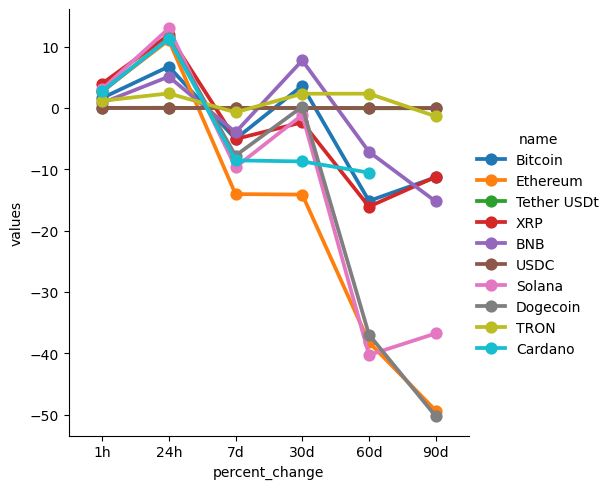

In [160]:
sns.catplot(x='percent_change',y='values', hue='name',data=df8[0:59],kind='point')

In [162]:
df10 = df3[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,81158.44836,2025-04-09 20:37:06.110774
100,Bitcoin,81468.88467,2025-04-09 20:38:07.121031
200,Bitcoin,82106.08001,2025-04-09 23:31:20.869770
300,Bitcoin,82079.25196,2025-04-09 23:32:21.850351
400,Bitcoin,82035.84636,2025-04-09 23:33:22.981531


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

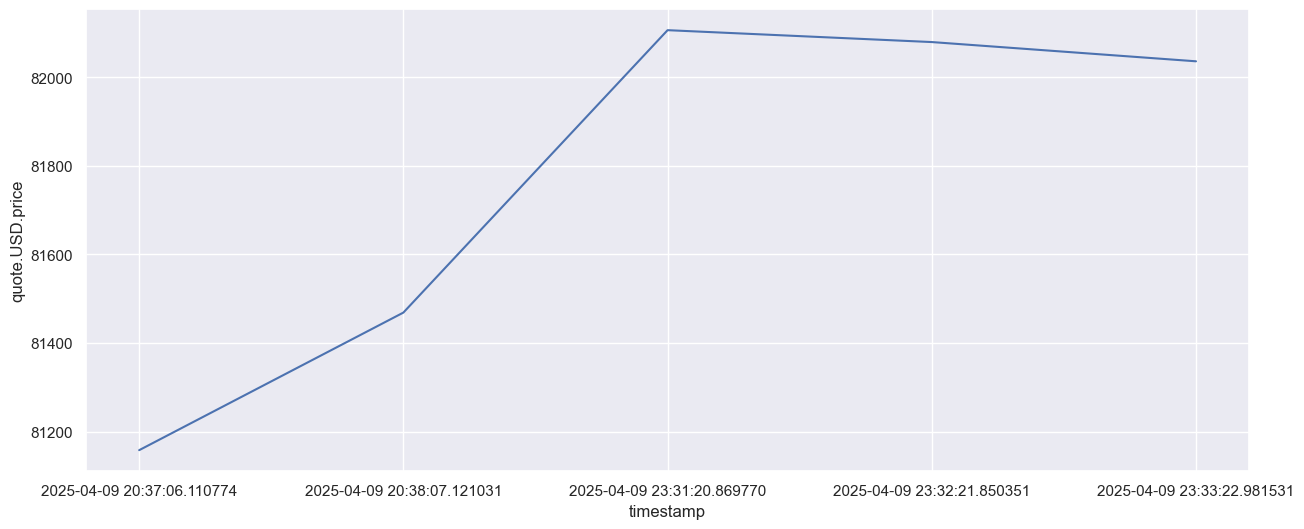

In [178]:
sns.set_theme(style='darkgrid')
sns.set_theme(rc={'figure.figsize':(15,6)})
sns.lineplot(x='timestamp',y='quote.USD.price',data = df10)